# Matrix Decompositions

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import sympy as sy
sy.init_printing() 

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

## The Gram-Schmidt Process

The <font face="gotham" color="red"> Gram-Schmidt Process </font> is an algorithm of producing an orthogonal or orthonormal basis.

### The key concepts

* Given an arbitrary basis $\{u_1,u_2,…,u_n\}$ for an $n$-dimensional inner product space $V$
* which implies the column rank be $n$
* The Gram-Schmidt algorithm constructs an orthogonal basis $\{v_1,v_2,…,v_n\}$ for $V$
* Step 1: Let ${\bf v}_1 = {\bf u}_1$
* Step 2: Let ${\bf v}_2 = {\bf u}_2 – \frac{\langle
		{\bf u}_2,{\bf v}_1\rangle}{\| {\bf v}_1 \|^{2}}{\bf v}_1$
        
* Step 3: Let ${\bf v}_3 = {\bf u}_3- \frac{\langle
		{\bf u}_3,{\bf v}_1\rangle}{\| {\bf v}_1 \|^{2}}{\bf v}_1 – \frac{\langle
		{\bf u}_3,{\bf v}_2\rangle}{\| {\bf v}_2 \|^{2}}{\bf v}_2$
        
* and so on so forth...

### An Example in $\mathbb{R}^3$

$$\large \text { Let } W=\operatorname{Span}\left\{\mathbf{x}_{1}, \mathbf{x}_{2}, \mathbf{x}_{3}\right\}, \text { where } \mathbf{x}_{1}=\left[\begin{array}{l}
3 \\
6 \\
2
\end{array}\right] \text {, } \mathbf{x}_{2}=\left[\begin{array}{l}
1 \\
2 \\
4
\end{array}\right]\text {, and }\mathbf{x}_{3}=\left[\begin{array}{l}
2 \\
-2 \\
1
\end{array}\right]$$.

* They are not orthogonal
* We can construct an orthogonal basis $\{\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3\}$ for $W$ based on $\left\{\mathbf{x}_{1}, \mathbf{x}_{2}, \mathbf{x}_{3}\right\}$. 

We will visualize the process.

First we plot the $W=\operatorname{Span}\left\{\mathbf{x}_{1}, \mathbf{x}_{2},\mathbf{x}_{3}\right\}$.

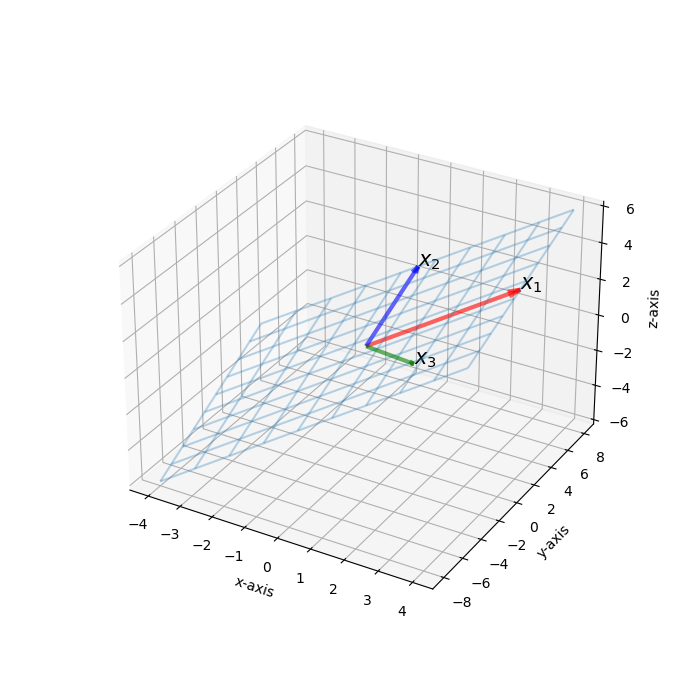

In [5]:
######################## Subspace W ##############################
# if your plot is not interactive, you may want to run "pip install ipympl" then restart your jupyter notebook.

%matplotlib widget
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

vec = np.array([[[0,0,0,3, 6, 2]],
             [[0,0,0,1, 2, 4]],
             [[0,0,0,2, -2, 1]]])

X = vec[0,:,3] * S + vec[1,:,3] * T
Y = vec[0,:,4] * S + vec[1,:,4] * T
Z = vec[0,:,5] * S + vec[1,:,5] * T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1 and x2 ##############################
colors = ['r','b','g']
s = ['$x_1$', '$x_2$', '$x_3$']
for i in range(vec.shape[0]):
    X,Y,Z,U,V,W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False,
              color = colors[i], alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3)
    ax.text(vec[i,:,3][0], vec[i,:,4][0], vec[i,:,5][0], s = s[i], size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

If we choose $\mathbf{v}_1= \mathbf{x}_1$, then the orthogonal component of projection of $\mathbf{x}_2$ onto $\mathbf{v}_1$ is $\mathbf{v}_2$.

Define $\text{Proj}_{\mathbf{v}_1}\mathbf{x}_2 = \alpha \mathbf{x}_1$, then $(\mathbf{x}_2 - \alpha \mathbf{x}_1)\cdot \mathbf{x}_1 = 0$, rearange for $\alpha$

$$\large 
\alpha = \frac{\mathbf{x}_2^T\mathbf{x}_1}{\mathbf{x}_1^T\mathbf{x}_1}
$$

According to definition above

$$\large 
\text{Proj}_{\mathbf{v}_1}\mathbf{x}_2 = \alpha \mathbf{x}_1 = \frac{\mathbf{x}_2^T\mathbf{x}_1}{\mathbf{x}_1^T\mathbf{x}_1}\mathbf{x}_1
$$

The orthogonal component, $\mathbf{v}_2$ is 

$$\large 
\mathbf{x}_2- \text{Proj}_{\mathbf{v}_1}\mathbf{x}_2 =\mathbf{x}_2 - \frac{\mathbf{x}_2^T\mathbf{x}_1}{\mathbf{x}_1^T\mathbf{x}_1}\mathbf{x}_1
$$

In [6]:
x1 = np.array([3, 6, 2])
x2 = np.array([1, 2, 4])
v2 = x2 - (x2@x1)/(x1@x1)*x1;v2

array([-0.408, -0.816,  3.061])

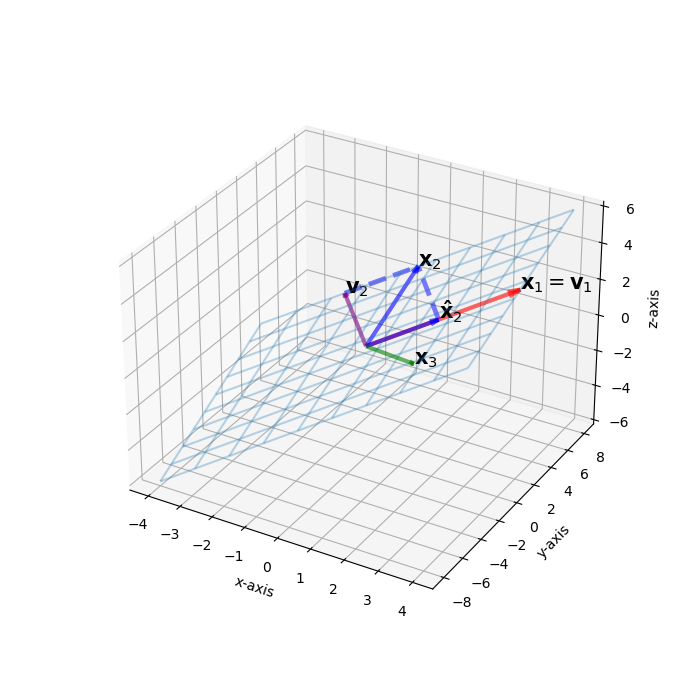

In [7]:
%matplotlib notebook

######################## Subspace W ##############################

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

x1,v1 = np.array([3, 6, 2]),np.array([3, 6, 2])
x2 = np.array([1, 2, 4])
x3 = np.array([2, -2, 1])

X = x1[0] * S + x2[0] * T
Y = x1[1] * S + x2[1] * T
Z = x1[2] * S + x2[2] * T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1, x2, v2, alpha*v1 ##############################

vec = np.array([[0, 0, 0, x1[0], x1[1], x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x2[0], x2[1], x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x3[0], x3[1], x3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'green', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, v2[0], v2[1], v2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

alpha = (x2@x1)/(x1@x1)

vec = np.array([[0, 0, 0, alpha*x1[0], alpha*x1[1], alpha*x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


ax.text(x1[0], x1[1], x1[2], '$\mathbf{x}_1 = \mathbf{v}_1 $', size = 15)
ax.text(x2[0], x2[1], x2[2], '$\mathbf{x}_2$', size = 15)
ax.text(x3[0], x3[1], x3[2], '$\mathbf{x}_3$', size = 15)
ax.text(v2[0], v2[1], v2[2], '$\mathbf{v}_2$', size = 15)

ax.text(x=alpha*x1[0], y=alpha*x1[1], z=alpha*x1[2], s = r'$\mathbf{\hat{x}}_2$', size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

################################# Dashed Line ##################################

point1 = [alpha*x1[0], alpha*x1[1], alpha*x1[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

point1 = [v2[0], v2[1], v2[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')
plt.show()

Next step, we find $\mathbf{v}_3$, define $W = \text{Span}\{\mathbf{v}_1, \mathbf{v}_2\}$

$$\large 
\mathbf{x}_3- \text{Proj}_{W}\mathbf{x}_3 =\mathbf{x}_3 - \frac{\mathbf{x}_3^T\mathbf{v}_1}{\mathbf{v}_1^T\mathbf{v}_1}\mathbf{v}_1-\frac{\mathbf{x}_3^T\mathbf{v}_2}{\mathbf{v}_2^T\mathbf{v}_2}\mathbf{v}_2
$$

Again, the codes are superfluous, yet exceedingly intuitive.

In [10]:
x3 = np.array([2, -2, 1])
projW_x3 = (x3@v1)/(v1@v1)*v1 + (x3@v2)/(v2@v2)*v2
v3 = x3 - projW_x3; v3

array([ 2.4, -1.2, -0. ])

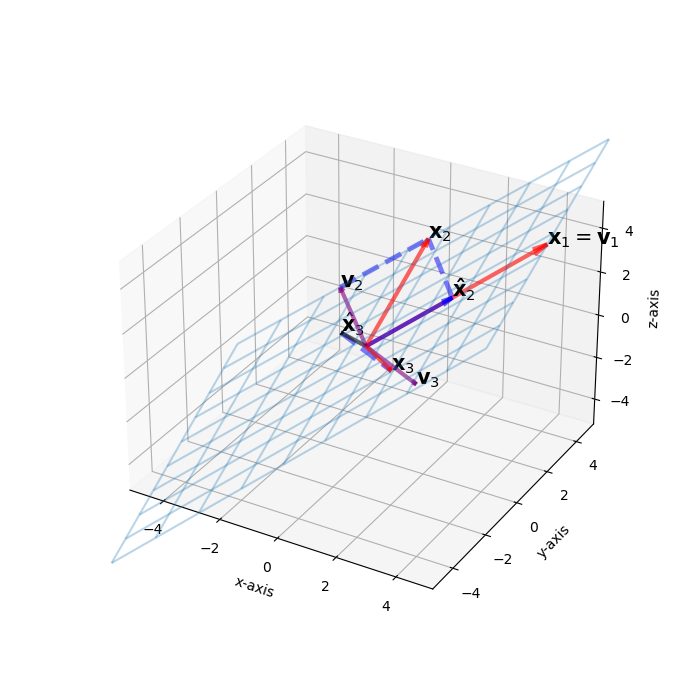

In [11]:
# %matplotlib notebook

######################## Subspace W ##############################

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

x1 = np.array([3, 6, 2])
x2 = np.array([1, 2, 4])
x3 = np.array([2, -2, 1])

X = x1[0] * S + x2[0] * T
Y = x1[1] * S + x2[1] * T
Z = x1[2] * S + x2[2] * T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1, x2, v2, alpha*v1 ##############################

vec = np.array([[0, 0, 0, x1[0], x1[1], x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x2[0], x2[1], x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, x3[0], x3[1], x3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, v2[0], v2[1], v2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, projW_x3[0], projW_x3[1], projW_x3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'black', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)



alpha = (x2@x1)/(x1@x1)
projW_x2 = np.zeros(3)
projW_x2[0], projW_x2[1], projW_x2[2] = alpha*x1[0],alpha*x1[1], alpha*x1[2]

vec = np.array([[0, 0, 0, projW_x2[0], projW_x2[1], projW_x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .6,arrow_length_ratio = .12, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

vec = np.array([[0, 0, 0, v3[0], v3[1], v3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


ax.text(x1[0], x1[1], x1[2], '$\mathbf{x}_1 = \mathbf{v}_1 $', size = 15)
ax.text(x2[0], x2[1], x2[2], '$\mathbf{x}_2$', size = 15)
ax.text(x3[0], x3[1], x3[2], '$\mathbf{x}_3$', size = 15)
ax.text(v2[0], v2[1], v2[2], '$\mathbf{v}_2$', size = 15)
ax.text(v3[0], v3[1], v3[2], '$\mathbf{v}_3$', size = 15)
ax.text(projW_x3[0], projW_x3[1], projW_x3[2], '$\hat{\mathbf{x}}_3$', size = 15)

ax.text(x=alpha*x1[0], y=alpha*x1[1], z=alpha*x1[2], s = r'$\mathbf{\hat{x}}_2$', size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

################################# Dashed Line ##################################

point1 = [alpha*x1[0], alpha*x1[1], alpha*x1[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

point1 = [v2[0], v2[1], v2[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')

point1 = [projW_x3[0], projW_x3[1], projW_x3[2]]
point2 = [x3[0], x3[1], x3[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 3.5,alpha =0.5, ls = '--')


################################ Axes ######################################
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
plt.show()

* Now we have orthogonal basis $\{\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3\}$
* we can normalize them.
* The column of $U$ is a set of orthonormal basis.

In [20]:
v1 = x1
u1 = v1/np.linalg.norm(v1)
u2 = v2/np.linalg.norm(v2)
u3 = v3/np.linalg.norm(v3)

U = np.vstack((u1, u2, u3)).T
U

array([[ 0.429, -0.128,  0.894],
       [ 0.857, -0.256, -0.447],
       [ 0.286,  0.958, -0.   ]])

In [21]:
U.T@U

array([[ 1.,  0., -0.],
       [ 0.,  1., -0.],
       [-0., -0.,  1.]])

## SymPy Functions for Gram-Schmidt Process

We need to prepare all the vectors in a form

$$\large 
L = [\mathbf v_1,\ \mathbf v_2,\ ...,\ \mathbf v_n]
$$

where $\mathbf v_i, i\in (1,2,...n)$ is a column vector.

In [11]:
x1, x2, x3

(array([3, 6, 2]), array([1, 2, 4]), array([ 2, -2,  1]))

In [12]:
L = [sy.Matrix([x1]).T, sy.Matrix([x2]).T, sy.Matrix([x3]).T]
L

⎡⎡3⎤  ⎡1⎤  ⎡2 ⎤⎤
⎢⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎢⎢6⎥, ⎢2⎥, ⎢-2⎥⎥
⎢⎢ ⎥  ⎢ ⎥  ⎢  ⎥⎥
⎣⎣2⎦  ⎣4⎦  ⎣1 ⎦⎦

In [13]:
ort = sy.GramSchmidt(L)
ort_norm = sy.GramSchmidt(L, orthonormal = True)

In [14]:
ort

⎡     ⎡-20 ⎤        ⎤
⎢     ⎢────⎥        ⎥
⎢     ⎢ 49 ⎥        ⎥
⎢⎡3⎤  ⎢    ⎥  ⎡12/5⎤⎥
⎢⎢ ⎥  ⎢-40 ⎥  ⎢    ⎥⎥
⎢⎢6⎥, ⎢────⎥, ⎢-6/5⎥⎥
⎢⎢ ⎥  ⎢ 49 ⎥  ⎢    ⎥⎥
⎢⎣2⎦  ⎢    ⎥  ⎣ 0  ⎦⎥
⎢     ⎢150 ⎥        ⎥
⎢     ⎢─── ⎥        ⎥
⎣     ⎣ 49 ⎦        ⎦

In [15]:
ort_norm

⎡       ⎡-2⋅√5 ⎤        ⎤
⎢       ⎢──────⎥  ⎡2⋅√5⎤⎥
⎢       ⎢  35  ⎥  ⎢────⎥⎥
⎢⎡3/7⎤  ⎢      ⎥  ⎢ 5  ⎥⎥
⎢⎢   ⎥  ⎢-4⋅√5 ⎥  ⎢    ⎥⎥
⎢⎢6/7⎥, ⎢──────⎥, ⎢-√5 ⎥⎥
⎢⎢   ⎥  ⎢  35  ⎥  ⎢────⎥⎥
⎢⎣2/7⎦  ⎢      ⎥  ⎢ 5  ⎥⎥
⎢       ⎢ 3⋅√5 ⎥  ⎢    ⎥⎥
⎢       ⎢ ──── ⎥  ⎣ 0  ⎦⎥
⎣       ⎣  7   ⎦        ⎦

Test if it is normalized.

In [16]:
for i in range(3):
    print(ort_norm[i].T*ort_norm[i])

Matrix([[1]])
Matrix([[1]])
Matrix([[1]])


Any two vectors are also perpendicular, for instance

In [17]:
ort_norm[0].T*ort_norm[1]

[0]

In [18]:
ort_norm[1].T*ort_norm[2]

[0]

Similarly we can use ```sy.Matrix.orthogonalize()```.

In [19]:
sy.Matrix.orthogonalize(sy.Matrix([x1]).T, sy.Matrix([x2]).T, sy.Matrix([x3]).T, normalize = True)

⎡       ⎡-2⋅√5 ⎤        ⎤
⎢       ⎢──────⎥  ⎡2⋅√5⎤⎥
⎢       ⎢  35  ⎥  ⎢────⎥⎥
⎢⎡3/7⎤  ⎢      ⎥  ⎢ 5  ⎥⎥
⎢⎢   ⎥  ⎢-4⋅√5 ⎥  ⎢    ⎥⎥
⎢⎢6/7⎥, ⎢──────⎥, ⎢-√5 ⎥⎥
⎢⎢   ⎥  ⎢  35  ⎥  ⎢────⎥⎥
⎢⎣2/7⎦  ⎢      ⎥  ⎢ 5  ⎥⎥
⎢       ⎢ 3⋅√5 ⎥  ⎢    ⎥⎥
⎢       ⎢ ──── ⎥  ⎣ 0  ⎦⎥
⎣       ⎣  7   ⎦        ⎦

## The QR Decomposition

If the rank of $A_{m \times n} $ is $n$, then $A$ can be one unique decomposition by

$$\large A_{m \times n} = Q_{m \times n}R_{n \times n}$$

* Q - orthogonal matrices
* R - right triangular matrices
* But it is not very nice to call it OR, so we call it QR. 
* QR decomposition is for solving linear systems and very common for least squares solution as well. 
* QR decomposition is based Gram-Schmidt process.

Consider two matrices

$$\large A=\left[\mathbf{a}_{1}, \ldots, \mathbf{a}_{n}\right]\quad\text{and}\quad Q=\left[\mathbf{u}_{1}, \ldots, \mathbf{u}_{n}\right]$$

where $Q$ is the orthonormalized $A$. We define $$\large R = Q^TA$$:

$$\large R=\left[\begin{array}{cccc}
\mathbf{u}_{1}^T \mathbf{a}_{1}& \mathbf{u}_{1}^T \mathbf{a}_{2} &\mathbf{u}_{1}^T\mathbf{a}_{3} & \dots &\mathbf{u}_{1}^T\mathbf{a}_{n}\\
0 &\mathbf{u}_{2}^T\mathbf{a}_{2} & \mathbf{u}_{2}^T \mathbf{a}_{3}& \dots &\mathbf{u}_{2}^T\mathbf{a}_{n}\\
0 & 0 & \mathbf{u}_{3}^T \mathbf{a}_{3}& \dots& \mathbf{u}_{3}^T\mathbf{a}_{n}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
0& 0&0 & \dots &\mathbf{u}_{n}^T\mathbf{a}_{n}
\end{array}\right]$$

You can prove that $R$ will be a right triangular matrix.
https://en.wikipedia.org/wiki/QR_decomposition

Because $Q$ is an orthonormal matrix, i.e., $QQ^T=I$ or $Q^T=Q^{-1}$, we can multiple Q on both sides

$$\large 
QR = QQ^TA
$$


$$\large 
A = QR
$$

In [20]:
A = np.round(np.random.randn(10, 5)*100); A

array([[ -79.,  152., -162.,   34.,   27.],
       [  57.,  259.,  -71.,   24., -152.],
       [  27.,  -22.,   15.,  -48.,   -6.],
       [ -77.,  -48.,   -9.,   67.,  -89.],
       [-103.,  -99.,    0.,  -26.,   49.],
       [-134., -153.,  155.,  192.,   72.],
       [ 157.,   23.,   95.,  119., -189.],
       [ 231.,   52., -137.,  150.,  -50.],
       [ -66.,   99., -106.,   81.,  -25.],
       [ 110.,  -43.,  -34., -109.,    5.]])

In [21]:
Q, R = np.linalg.qr(A)

In [22]:
Q

array([[-0.212, -0.488,  0.341, -0.15 ,  0.134],
       [ 0.153, -0.674, -0.344,  0.006, -0.117],
       [ 0.072,  0.083, -0.012,  0.155, -0.076],
       [-0.206,  0.071,  0.166, -0.249, -0.781],
       [-0.276,  0.191,  0.256,  0.026, -0.257],
       [-0.359,  0.316, -0.3  , -0.594,  0.305],
       [ 0.421,  0.064, -0.49 , -0.29 , -0.373],
       [ 0.619,  0.044,  0.473, -0.522,  0.158],
       [-0.177, -0.33 ,  0.225, -0.287, -0.126],
       [ 0.295,  0.21 ,  0.258,  0.314, -0.114]])

In [23]:
R

array([[ 373.067,  109.672,  -65.396,   13.869, -154.996],
       [   0.   , -359.219,  204.402,  -11.536,  109.586],
       [   0.   ,    0.   , -223.037,  -46.472,  102.546],
       [   0.   ,    0.   ,    0.   , -314.138,   64.42 ],
       [   0.   ,    0.   ,    0.   ,    0.   ,  165.974]])

### Another example in SymPy, here we convert fraction into float with ```sy.N()``` and round it with ```round_expr```.

In [24]:
M1=sy.randMatrix(4, 3)
M1

⎡93  42  68⎤
⎢          ⎥
⎢87  91  5 ⎥
⎢          ⎥
⎢42  62  46⎥
⎢          ⎥
⎣5   21  20⎦

In [25]:
sy.matrices.MatrixBase.QRdecomposition(sy.randMatrix(4, 3))

⎛⎡61⋅√9706  -97389⋅√3251597354    175883397⋅√11861428452511082 ⎤              
⎜⎢────────  ───────────────────   ──────────────────────────── ⎥              
⎜⎢  9706        22761181478            41514999583788787       ⎥  ⎡        119
⎜⎢                                                             ⎥  ⎢√9706   ───
⎜⎢15⋅√9706  189743⋅√3251597354    30981217⋅√11861428452511082  ⎥  ⎢           
⎜⎢────────  ──────────────────    ───────────────────────────  ⎥  ⎢           
⎜⎢  4853       11380590739             83029999167577574       ⎥  ⎢       7⋅√3
⎜⎢                                                             ⎥, ⎢  0    ────
⎜⎢27⋅√9706  -31173⋅√3251597354    217436691⋅√11861428452511082 ⎥  ⎢           
⎜⎢────────  ───────────────────   ──────────────────────────── ⎥  ⎢           
⎜⎢  9706        22761181478            41514999583788787       ⎥  ⎢           
⎜⎢                                                             ⎥  ⎢  0        
⎜⎢33⋅√9706  -34865⋅√3251597354   -517102913⋅√1186142

In [26]:
round_expr(sy.N(sy.matrices.MatrixBase.QRdecomposition(M1)[0]),4)

⎡0.693   -0.6479  0.3058 ⎤
⎢                        ⎥
⎢0.6483  0.4075   -0.6341⎥
⎢                        ⎥
⎢0.313   0.5509   0.5891 ⎥
⎢                        ⎥
⎣0.0373  0.3326   0.3968 ⎦

In [27]:
round_expr(sy.N(sy.matrices.MatrixBase.QRdecomposition(M1)[1]),4)

⎡134.1902  108.2941  65.5115 ⎤
⎢                            ⎥
⎢   0      51.0137   -10.0269⎥
⎢                            ⎥
⎣   0         0      52.6565 ⎦

##  Solve Linear Systems of Equations using QR Decomposition

When we have the same number of equations as unknowns, we have the following system 
$$\large Ax= b$$

with a squre matrix $A$. 

* We assume that the matrix $A$ has full rank. 
* That is the system has an unique solution. 
* Solve it by QR decomposion. 

Consider the following system of equations:

$$\large \begin{bmatrix}5&-2&2 \\ 4 & -3 &4 \\ 4& -6 &7 \end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}=\begin{bmatrix}1\\2\\3\end{bmatrix}$$



In [28]:
A = np.matrix([[5, -2, 2], [4, -3, 4], [4,-6,7]])
b = np.matrix([[1],[2],[3]])
display(sy.Matrix(A))
display(sy.Matrix(b))

⎡5  -2  2⎤
⎢        ⎥
⎢4  -3  4⎥
⎢        ⎥
⎣4  -6  7⎦

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

When we solve for $Ax=b$ with QR decomposition. We have the following steps:
+ Find the QR decomposition of $A$
+ From $QRx=b$, we obtain $Rx =Q^\top b$ 
+ Solve for $x$ using back substitution.



**Back substitution.** 
$$\large R x = b$$
where $R$ is an upper-triangular matrix. 

When we solve for $x$, we start with $x_n$: 
$$\large x_n = {b_n\over R_{n,n}}$$
Then we solve for $x_{n-1}$ as 
$$\large x_{n-1} = {b_{n-1}-R_{n-1,n}x_n\over R_{n-1,n-1}}$$
$$\large x_{n-2} = {b_{n-2}-R_{n-2,n-1}x_{n-1}-R_{n-2,n}x_n\over R_{n-2,n-2}}$$
Then we can find $x_{n-2},\cdots,x_1$.
We can solve for all components of $x$ in the reserved order. So this is call back substitution.


In [29]:
Q, R = np.linalg.qr(A)

In [30]:
Q

matrix([[-0.662,  0.591,  0.461],
        [-0.53 ,  0.066, -0.846],
        [-0.53 , -0.804,  0.269]])

In [31]:
R

matrix([[-7.55 ,  6.093, -7.152],
        [ 0.   ,  3.446, -4.184],
        [ 0.   ,  0.   , -0.576]])

In [32]:
Q.T@b

matrix([[-3.311],
        [-1.69 ],
        [-0.423]])

In [33]:
x3=-0.423/-0.576
x3

In [34]:
x2 = (-1.69 + 4.184 * x3)/3.446
x2

In [35]:
x1=(-3.311+7.152*x3-6.093*x2)/(-7.55)
x1

To confirm our result, let's compare with ```np.linalg.solve()```

In [36]:
np.linalg.solve(A, b)

matrix([[0.067],
        [0.4  ],
        [0.733]])

## Diagonalization of Symmetric Matrices

The first theorem of symmetric matrix:

**If $A$ is symmetric, i.e. $A = A^T$, then any two eigenvectors from different eigenspaces are orthogonal**. We can prove it easily as below:

$$\large \begin{aligned}
\lambda_{1} \mathbf{v}_{1} \cdot \mathbf{v}_{2} &=\left(\lambda_{1} \mathbf{v}_{1}\right)^{T} \mathbf{v}_{2}=\left(A \mathbf{v}_{1}\right)^{T} \mathbf{v}_{2} \\
&=\left(\mathbf{v}_{1}^{T} A^{T}\right) \mathbf{v}_{2}=\mathbf{v}_{1}^{T}\left(A \mathbf{v}_{2}\right) \\
&=\mathbf{v}_{1}^{T}\left(\lambda_{2} \mathbf{v}_{2}\right) \\
&=\lambda_{2} \mathbf{v}_{1}^{T} \mathbf{v}_{2}=\lambda_{2} \mathbf{v}_{1} \cdot \mathbf{v}_{2}
\end{aligned}$$

Because $\lambda_1 \neq \lambda_2$, so only condition which makes the equation holds is 

$$\large 
 \mathbf{v}_{1} \cdot \mathbf{v}_{2}=0
$$

**In other words, if symmetric matrix $A$ has different eigenvalues, its corresponding eigenvectors must be mutually orthogonal.**

An $n \times n$ matrix $A$ is said to be orthogonally diagonalizable when an orthogonal matrix $P$ can be
found such that $P^{-1}AP = P^TAP$ is diagonal.

If $P^TAP = D$ is diagonal, where $P^{-1} = P^T$, then $A = PDP^T$. But $D^T = D$, so this gives

$$\large A^T = P^{TT}D^TP^T = PDP^T = A$$


So, the diagonalization of $A$ is 

$$\large 
A = PDP^T = PDP^{-1}
$$

where $P$ is an orthonormal matrix with all eigenvectors of $A$ and $PP^T = I$ means $P^T$ is $P^{-1}$, and 

the diagonal entries of $D$ are the corresponding eigenvalues of $A$

The <font face="gotham" color="red"> second</font> theorem of symmetric matrix:

<font face="gotham" color="red"> An $n \times n$ matrix $A$ is orthogonally diagonalizable if and only if $A$ is a symmetric matrix: $A^{T}=\left(P D P^{T}\right)^{T}=P^{T T} D^{T} P^{T}=P D P^{T}=A$.</font>

### An Example

Create a random symmetric matrix.

In [37]:
A = np.round(2*np.random.rand(3, 3)); A

array([[2., 1., 2.],
       [1., 1., 1.],
       [2., 1., 2.]])

In [38]:
B = A@A.T; B # generate a symmetric matrix

array([[9., 5., 9.],
       [5., 3., 5.],
       [9., 5., 9.]])

Perform diagonalization with ```np.linalg.eig()```.

In [39]:
D, P = np.linalg.eig(B); P

array([[-0.657, -0.707,  0.261],
       [-0.369,  0.   , -0.929],
       [-0.657,  0.707,  0.261]])

In [40]:
D = np.diag(D); D

array([[20.808,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.192]])

Check the norm of all eigenvectors.

In [41]:
for i in [0, 1, 2]:
    print(np.linalg.norm(P[:,i]))

1.0
1.0
1.0


Check the orthogonality of eigenvectors, see if $PP^T=I$

In [42]:
P@P.T

array([[ 1., -0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [43]:
P@D@P.T #which is same as B

array([[9., 5., 9.],
       [5., 3., 5.],
       [9., 5., 9.]])

### The Spectral Theorem

**Notes:** When learning the below content, think about Taylor series or principal components where we use the fewer terms to approximate the original expression.

An $n \times n$ symmetric matrix $A$ has the following properties:
1. $A$ has $n$ real eigenvalues, counting multiplicities.
2. The dimension of the eigenspace for each eigenvalue $\lambda$ equals the multiplicity of $\lambda$ as a root of the characteristic equation.
3. The eigenspaces are mutually orthogonal, in the sense that eigenvectors corresponding to different eigenvalues are orthogonal.
4. $A$ is orthogonally diagonalizable.

All these properties are obvious without proof, as the example above shows.

However the purpose of the theorem  is not reiterating last section, it paves the way for <font face="gotham" color="red">spectral decomposition</font>.

Write diagonalization explicitly, we get the representation of spectral decomposition

$$\large 
\begin{aligned}
A &=P D P^{T}=\left[\begin{array}{lll}
\mathbf{u}_{1} & \cdots & \mathbf{u}_{n}
\end{array}\right]\left[\begin{array}{ccc}
\lambda_{1} & & 0 \\
& \ddots & \\
0 & & \lambda_{n}
\end{array}\right]\left[\begin{array}{c}
\mathbf{u}_{1}^{T} \\
\vdots \\
\mathbf{u}_{n}^{T}
\end{array}\right] \\
&=\left[\begin{array}{lll}
\lambda_{1} \mathbf{u}_{1} & \cdots & \lambda_{n} \mathbf{u}_{n}
\end{array}\right]\left[\begin{array}{c}
\mathbf{u}_{1}^{T} \\
\vdots \\
\mathbf{u}_{n}^{T}
\end{array}\right]\\
&= \lambda_{1} \mathbf{u}_{1} \mathbf{u}_{1}^{T}+\lambda_{2} \mathbf{u}_{2} \mathbf{u}_{2}^{T}+\cdots+\lambda_{n} \mathbf{u}_{n} \mathbf{u}_{n}^{T}
\end{aligned}
$$

$ \mathbf{u}_{i} \mathbf{u}_{i}^{T}$ are rank $1$ symmetric matrices, because all rows of $ \mathbf{u}_{i} \mathbf{u}_{i}^{T}$ are multiples of $\mathbf{u}_{i}^{T}$.

Following the example above, we demonstrate in SymPy.

In [44]:
lamb0,lamb1,lamb2 = D[0,0], D[1,1], D[2,2]
u0,u1,u2 = P[:,0], P[:,1], P[:,2]

In [45]:
lamb0,lamb1,lamb2

In [46]:
u0,u1,u2

(array([-0.657, -0.369, -0.657]),
 array([-0.707,  0.   ,  0.707]),
 array([ 0.261, -0.929,  0.261]))

Check rank of $ \mathbf{u}_{i} \mathbf{u}_{i}^{T}$ by ```np.linalg.matrix_rank()```.

In [47]:
np.outer(u0,u0)

array([[0.432, 0.243, 0.432],
       [0.243, 0.136, 0.243],
       [0.432, 0.243, 0.432]])

In [48]:
np.linalg.matrix_rank(np.outer(u0,u0))

1

Use spectral theorem to recover $A$:

In [49]:
specDecomp = lamb0 * np.outer(u0,u0) + lamb1 * np.outer(u1,u1) + lamb2 * np.outer(u2,u2)
specDecomp

array([[9., 5., 9.],
       [5., 3., 5.],
       [9., 5., 9.]])

In [50]:
lamb0 * np.outer(u0,u0) + lamb2 * np.outer(u2,u2)

array([[9., 5., 9.],
       [5., 3., 5.],
       [9., 5., 9.]])

In [51]:
lamb0 * np.outer(u0,u0)

array([[8.987, 5.047, 8.987],
       [5.047, 2.834, 5.047],
       [8.987, 5.047, 8.987]])

## Quadratic Form

A **quadratic form** is a function with form $Q(\mathbf{x})=\mathbf{x}^TA\mathbf{x}$, where $A$ is an $n\times n$ symmetric matrix, which is called the **the matrix of the quadratic form**.

Consider a matrix of quadratic form 

$$\large 
A = 
\left[
\begin{matrix}
3 & 2 & 0\\
2 & -1 & 4\\
0 & 4 & -2
\end{matrix}
\right]
$$

construct the quadratic form $\mathbf{x}^TA\mathbf{x}$.

\begin{align}
\mathbf{x}^TA\mathbf{x}&=
\left[
\begin{matrix}
x_1 & x_2 & x_3
\end{matrix}
\right]
\left[
\begin{matrix}
3 & 2 & 0\\
2 & -1 & 4\\
0 & 4 & -2
\end{matrix}
\right]
\left[
\begin{matrix}
x_1 \\ x_2\\ x_3
\end{matrix}
\right]\\
& =\left[
\begin{matrix}
x_1 & x_2 & x_3
\end{matrix}
\right]
\left[
\begin{matrix}
3x_1+2x_2 \\ 2x_1-x_2+4x_3 \\ 4x_2-2x_3
\end{matrix}
\right]\\
& = 
x_1(3x_1+2x_2)+x_2(2x_1-x_2+4x_3)+x_3(4x_2-2x_3)\\
& = 3x_1^2+4x_1x_2-x_2^2+8x_2x_3-2x_3^2
\end{align}

Fortunately, there is an easier way to calculate quadratic form.

Notice that coefficients of $x_i^2$ is on the principal diagonal and coefficients of $x_ix_j$ are be split evenly between $(i,j)-$ and $(j, i)-$entries in $A$.

### Example

Consider another example,

$$\large 
A = 
\left[
\begin{matrix}
3 & 2 & 0 & 5\\
2 & -1 & 4 & -3\\
0 & 4 & -2 & -4\\
5 & -3 & -4 & 7
\end{matrix}
\right]
$$


All $x_i^2$'s terms are 

$$\large 
3x_1^2-x_2^2-2x_3^2+7x_4^2
$$

whose coefficients are from principal diagonal.

All $x_ix_j$'s terms are 

$$\large 
4x_1x_2+0x_1x_3+10x_1x_4+8x_2x_3-6x_2x_4-8x_3x_4
$$

Add up together then quadratic form is 

$$\large 
3x_1^2-x_2^2-2x_3^2+7x_4^2+4x_1x_2+0x_1x_3+10x_1x_4+8x_2x_3-6x_2x_4-8x_3x_4
$$

Let's verify in SymPy.

In [52]:
x1, x2, x3, x4 = sy.symbols('x_1 x_2 x_3 x_4')
A = sy.Matrix([[3,2,0,5],[2,-1,4,-3],[0,4,-2,-4],[5,-3,-4,7]])
x = sy.Matrix([x1, x2, x3, x4])

In [53]:
sy.expand(x.T*A*x)

⎡    2                          2                           2                 
⎣3⋅x₁  + 4⋅x₁⋅x₂ + 10⋅x₁⋅x₄ - x₂  + 8⋅x₂⋅x₃ - 6⋅x₂⋅x₄ - 2⋅x₃  - 8⋅x₃⋅x₄ + 7⋅x₄

2⎤
 ⎦

The results is exactly the same as we derived.

### Change of Variable in Quadratic Forms

To convert a matrix of quadratic form into diagonal matrix can save us same troubles, that is to say, no cross products terms. 

Since $A$ is symmetric, there is an orthonormal $P$ that

$$\large 
PDP^T = A \qquad \text{and}\qquad PP^T = I
$$

We can show that

$$\large \begin{align}
\mathbf{x}^TA\mathbf{x}&=\mathbf{x}^TIAI\mathbf{x} \\ 
&=\mathbf{x}^TPP^TAPP^T\mathbf{x} \\
&=\mathbf{x}^TPDP^T\mathbf{x} \\
&=(P^T\mathbf{x})^TDP^T\mathbf{x} \\
&=\mathbf{y}^T D \mathbf{y}\end{align}$$

where $P^T$ defined a coordinate transformation and $\mathbf{y} = P^T\mathbf{x}$.

Consider $A$

$$\large 
A = 
\left[
\begin{matrix}
3 & 2 & 0\\
2 & -1 & 4\\
0 & 4 & -2
\end{matrix}
\right]
$$

Find eigenvalue and eigenvectors.

In [54]:
A = np.array([[3,2,0],[2,-1,4],[0,4,-2]]); A

array([[ 3,  2,  0],
       [ 2, -1,  4],
       [ 0,  4, -2]])

In [55]:
D, P = np.linalg.eig(A)
D = np.diag(D); D

array([[ 4.388,  0.   ,  0.   ],
       [ 0.   ,  1.35 ,  0.   ],
       [ 0.   ,  0.   , -5.738]])

Test if $P$ is normalized.

In [56]:
P.T@P

array([[ 1., -0.,  0.],
       [-0.,  1., -0.],
       [ 0., -0.,  1.]])

We can compute $\mathbf{y}= P^T\mathbf{x}$

In [57]:
x1, x2, x3 = sy.symbols('x1 x2 x3')
x = sy.Matrix([[x1], [x2], [x3]])
x

⎡x₁⎤
⎢  ⎥
⎢x₂⎥
⎢  ⎥
⎣x₃⎦

In [58]:
P = round_expr(sy.Matrix(P), 4); P

⎡0.7738  -0.6143  0.1544 ⎤
⎢                        ⎥
⎢0.5369  0.5067   -0.6746⎥
⎢                        ⎥
⎣0.3362  0.6049   0.7219 ⎦

So the $\mathbf{y} = P^T \mathbf{x}$ is 

$$\large 
\left[\begin{matrix}0.7738 x_{1} + 0.5369 x_{2} + 0.3362 x_{3}\\- 0.6143 x_{1} + 0.5067 x_{2} + 0.6049 x_{3}\\0.1544 x_{1} - 0.6746 x_{2} + 0.7219 x_{3}\end{matrix}\right]
$$

The transformed quadratic form $\mathbf{y}^T D \mathbf{y}$ is

In [59]:
D =  round_expr(sy.Matrix(D),4);D

⎡4.3876    0        0   ⎤
⎢                       ⎥
⎢  0     1.3505     0   ⎥
⎢                       ⎥
⎣  0       0     -5.7381⎦

In [60]:
y1, y2, y3 = sy.symbols('y1 y2 y3')
y = sy.Matrix([[y1], [y2], [y3]]);y

⎡y₁⎤
⎢  ⎥
⎢y₂⎥
⎢  ⎥
⎣y₃⎦

In [61]:
y.T*D*y

⎡         2            2            2⎤
⎣4.3876⋅y₁  + 1.3505⋅y₂  - 5.7381⋅y₃ ⎦

### Cholesky Decomposition

Cholesky decomposition is modification of $LU$ decomposition. And it is more efficient than $LU$ algorithm.

If $A$ is positive definite matrix, i.e. $\mathbf{x}^{T} A \mathbf{x}>0$ or every eigenvalue is strictly positive. A positive definite matrix can be decomposed into a multiplication of lower triangular matrix and its transpose.

$$\large \begin{aligned}
{A}={L} {L}^{T} &=\left[\begin{array}{ccc}
l_{11} & 0 & 0 \\
l_{21} & l_{22} & 0 \\
l_{31} & l_{32} & l_{33}
\end{array}\right]\left[\begin{array}{ccc}
l_{11} & l_{21} & l_{31} \\
0 & l_{22} & l_{32} \\
0 & 0 & l_{33}
\end{array}\right] \\
\left[\begin{array}{ccc}
a_{11} & a_{21} & a_{31} \\
a_{21} & a_{22} & a_{32} \\
a_{31} & a_{32} & a_{33}
\end{array}\right] 
&=\left[\begin{array}{ccc}
l_{11}^{2} &l_{21} l_{11} & l_{31} l_{11} \\
l_{21} l_{11} & l_{21}^{2}+l_{22}^{2} & l_{31} l_{21}+l_{32} l_{22} \\
l_{31} l_{11} & l_{31} l_{21}+l_{32} l_{22} & l_{31}^{2}+l_{32}^{2}+l_{33}^{2}
\end{array}\right]
\end{aligned}$$

We will show this with NumPy.

In [62]:
A = np.array([[16, -8, -4], [-8, 29, 12], [-4, 12, 41]]); A

array([[16, -8, -4],
       [-8, 29, 12],
       [-4, 12, 41]])

In [63]:
L = sp.linalg.cholesky(A, lower = True); L

array([[ 4.,  0.,  0.],
       [-2.,  5.,  0.],
       [-1.,  2.,  6.]])

Check if $LL^T=A$

In [64]:
L@L.T

array([[16., -8., -4.],
       [-8., 29., 12.],
       [-4., 12., 41.]])

## The Singular Values

* _Spectral Decomposition_ can decompose any symmetric matrices unconditionally into three special matrices.
* However **only square matrices have eigenvalues and vectors**
* We want to extend a similar concept for any $m \times n$ matrices.

If $A$ is an $m \times n$ matrix, then $A^TA$ and $AA^T$ are both symmetric and orthogonally diagonalizable.

In [65]:
A = np.array([[4, -3], [-3, 2], [2, -1], [1, 0]]); A

array([[ 4, -3],
       [-3,  2],
       [ 2, -1],
       [ 1,  0]])

Compute eigenvalues and eigenvectors of $A^TA$.

In [66]:
ATA = A.T@A; ATA

array([[ 30, -20],
       [-20,  14]])

In [67]:
D1, P1 = np.linalg.eig(ATA)

Check if $P$ is an orthonormal matrix.

In [68]:
P1@P1.T

array([[1., 0.],
       [0., 1.]])

In [69]:
D1

array([43.541,  0.459])

The square roots of eigenvalues of $A^TA$ are called <font face="gotham" color="red"> singular values</font>  of $A$, denoted by $\sigma_1, ..., \sigma_n$ in decreasing order. 

We can also show that singular values of $A$ are the lengths of vectors $A\mathbf{v}_1,..., A\mathbf{v}_n$, where $\mathbf{v}_i$ is the eigenvalue of $A^TA$.

The length of $A\mathbf{v}_i$ is $\|A\mathbf{v}_i\|$

$$\large \begin{align}
\|A\mathbf{v}_i\| &= \sqrt{(A\mathbf{v}_i)^TA\mathbf{v}_i} \\
&= \sqrt{\mathbf{v}_i^TA^T A\mathbf{v}_i} \\
&=\sqrt{\mathbf{v}_i^T(\lambda_i\mathbf{v}_i)} \\
&= \sqrt{\lambda_i} \\
&=\sigma_1\end{align}
$$

where $\sqrt{\mathbf{v}_i^T\mathbf{v}_i} = 1$ and $\lambda_i$'s are eigenvalues of $A^TA$.

 ## Singular Value Decomposition

**Singular Value Decomposition** (SVD) is probably the most important decomposition technique in the history of linear algebra, it combines all the theory we discussed, then culminate at this point.

$A$ is a $m\times n$ matrix. However $AA^T$ and $A^TA$ are symmetric matrices,then both are orthogonally diagonalizable.

$$\large
AA^T = U\Sigma\Sigma^T U^T=(U\Sigma V^T)(V\Sigma U^T)\\
\large
A^TA = V\Sigma^T \Sigma V^T = (V\Sigma^T U^T)(U \Sigma V^T)
$$

where $\Sigma\Sigma^T$ is a diagonal matrix with all eigenvalues of $AA^T$ and $\Sigma^T \Sigma$ is a diagonal matrix with all eigenvalues of $VV^T$.

Because both $AA^T$ and $A^TA$ are symmetric, then $UU^T= U^TU=I_{m\times m}$ and $VV^T= V^TV=I_{n\times n}$.

We have implicitly shown the singular value decompositions above, one of the most important concept in linear algebra.

<font face="gotham" color="red">
$$
\Large
SVD:\quad
A_{m\times n} = U_{m\times m}\Sigma_{m \times n} V^T_{n \times n}
$$
</font>

The SVD theory guarantees that any matrix $A$, no matter its ranks or shapes, can be unconditionally decomposed into three special matrices.

So next question: what is $\Sigma$? 

It is an $m\times n$ main diagonal matrix, with all singular values on the main diagonal. Rewrite

$$
A^TA = V\Sigma^T \Sigma V^T = V\Sigma^2 V^T
$$

Post-multiply both sides by $V$

$$
A^TAV = V\Sigma^2
$$

This is the matrix version of $A\mathbf{v}_i = \lambda_i \mathbf{v}_i$, but here the matrix of interest is $A^TA$ rather than $A$. Similarly it can be written with singular values

$$
A^TA\mathbf{v}_i = \sigma_i^2\mathbf{v}_i
$$

Because $U$ and $V$ are not unique, we tend to standardize the solution by arranging $\sigma_1 \geq \sigma_2 \geq \sigma_3\geq ... \geq\sigma_r$.

Why we only arrange $r$ singular values? Because it is the rank of $A$, so is the rank of $A^TA$. Explicitly $\Sigma$ looks like


$$\Sigma =\left[\begin{array}{cccccc}
\sqrt{\lambda_{1}} & & & & &\\
& \sqrt{\lambda_{2}} & & & &\\
& & \ddots & & &\\
& & & \sqrt{\lambda}_{\mathrm{r}} & &\\
& & & & \ddots &\\
& & & & & 0 
\end{array}\right]
=\left[\begin{array}{cccccc}
\sigma_1 & & & & &\\
& \sigma_2 & & & &\\
& & \ddots & & &\\
& & & \sigma_r & &\\
& & & & \ddots &\\
& & & & & 0 
\end{array}\right]
$$

We can do the same for $AA^T$ and get

$$
AA^TU = U \Sigma^2
$$

or 

$$
AA^T\mathbf{u}_i = \sigma_i^2\mathbf{u}_i
$$

We have shown why $A_{m\times n} = U_{m\times m}\Sigma_{m \times n} V^T_{n \times n}$ holds.

To perfomr a SVD on $A$, we just need two equations and this is also a mannual procedure to decompose any matrix.

$$
A^TA = V\Sigma^T \Sigma V^T\\
AV = U\Sigma
$$

### Example

$$\large \mathbf A = \begin{bmatrix}2 & 4 \\ 1 & 3 \\ 0 & 0 \\ 0 & 0\end{bmatrix}
$$
  

$$\large \mathbf W = \mathbf A\mathbf A^{\mathsf T} = \begin{bmatrix}2 & 4 \\ 1 & 3 \\ 0 & 0 \\ 0 & 0\end{bmatrix}\begin{bmatrix}2 & 1 & 0 & 0 \\ 4 & 3 & 0 & 0\end{bmatrix} = \begin{bmatrix}20 & 14 & 0 & 0 \\ 14 & 10 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0\end{bmatrix}$$

Now we need to get the eigenvalues and eigenvectors.

$$\large (\mathbf W - \lambda\mathbf I)\vec x = \vec 0$$

So we get

$$\large \begin{bmatrix}
20 - \lambda & 14 & 0 & 0 \\
14 & 10 - \lambda & 0 & 0 \\
0 & 0 & -\lambda & 0 \\
0 & 0 & 0 & -\lambda
\end{bmatrix}\vec x = \vec 0 $$

The det must be zero to have non-zero solution.

$$\large \begin{vmatrix}
20 - \lambda & 14 & 0 & 0 \\
14 & 10 - \lambda & 0 & 0 \\
0 & 0 & -\lambda & 0 \\
0 & 0 & 0 & -\lambda
\end{vmatrix} =
\begin{vmatrix}
20 - \lambda & 14 \\
14 & 10 - \lambda \\
\end{vmatrix}\begin{vmatrix}
-\lambda & 0 \\
0 & -\lambda \\
\end{vmatrix}
= 0,$$

which is

$$\large \bigl((20 - \lambda)(10 - \lambda) - 196\bigr)\lambda^2 = 0$$

So we get the eigenvalues

$$\large \lambda_{1} = \lambda_{2} = 0, $$
$$\large \lambda_{3} = 15 + \sqrt{221} \approx 29.866, $$
$$\large \lambda_{4} = 15 - \sqrt{221} \approx 0.134$$

From the non-zero eigenvalues, we can ge the eigenvectors,

$$\large \mathbf U = \begin{bmatrix}-0.82 & -0.58 \\ -0.58 & 0.82  \\ 0 & 0  \\ 0 & 0 \end{bmatrix} $$

Since $AA^T$ and $A^TA$ have same eigenvalues, we can reuse the eigenvalues to get $V^T$

$$\large \mathbf V^T = \begin{bmatrix}-0.40 & -0.91 \\ -0.91 & 0.40\end{bmatrix}$$

Then we get the SVD decomposition of $A$.

$$\large \begin{bmatrix}2 & 4 \\ 1 & 3 \\ 0 & 0 \\ 0 & 0\end{bmatrix} \approx \begin{bmatrix}-0.82 & -0.58  \\ -0.58 & 0.82  \\ 0 & 0  \\ 0 & 0 \end{bmatrix}\begin{bmatrix}5.46 & 0 \\ 0 & 0.37 \end{bmatrix}\begin{bmatrix}-0.40 & -0.91 \\ -0.91 & 0.40\end{bmatrix}$$

Here's an example, let's say we have we have a data set $A$

In [70]:
A = np.array([[2, 4], [1, 3], [0, 0],[0, 0]])

Give it a $\text{SVD}$ decomposition

In [71]:
U, S, VT = np.linalg.svd(A, full_matrices=False)

In [72]:
U

array([[-0.817, -0.576],
       [-0.576,  0.817],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ]])

In [73]:
S

array([5.465, 0.366])

In [74]:
VT

array([[-0.405, -0.915],
       [-0.915,  0.405]])

In [75]:
U@np.diag(S)@VT

array([[2., 4.],
       [1., 3.],
       [0., 0.],
       [0., 0.]])

### The geometric interpretation

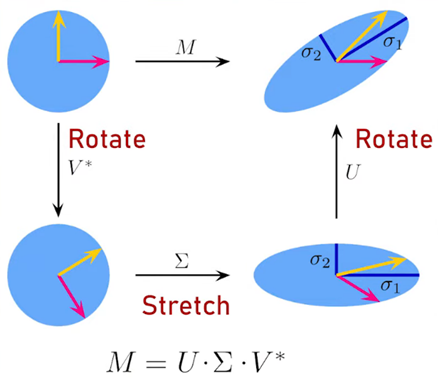

## Image Compression via SVD

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

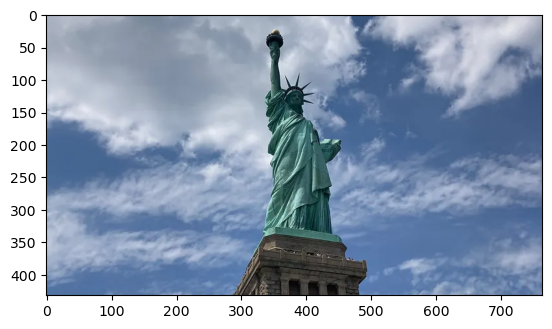

In [2]:
img = Image.open('nyc.jpg')
plt.imshow(img)

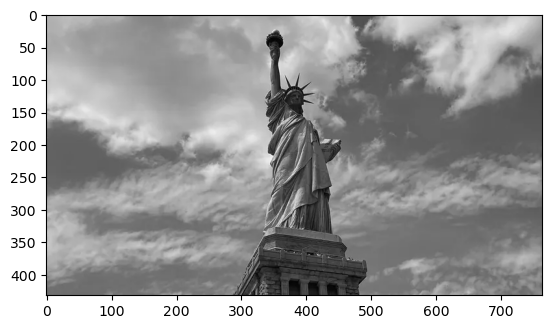

In [3]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

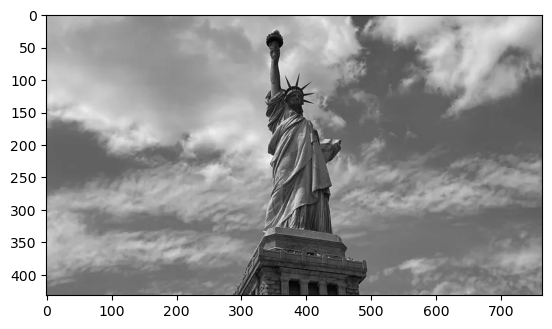

In [4]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [5]:
U, sigma, VT = np.linalg.svd(imgmat)

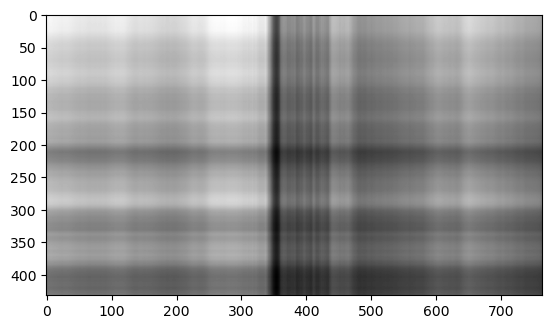

In [6]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(VT[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

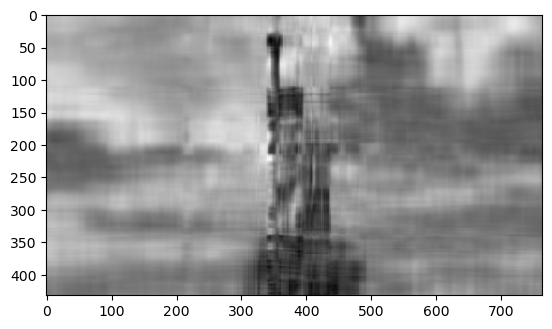

In [7]:
reconstimg = np.matrix(U[:, :10]) * np.diag(sigma[:10]) * np.matrix(VT[:10, :])
_ = plt.imshow(reconstimg, cmap='gray')

In [22]:
sigma

array([80271.08 ,  9918.39 ,  8158.215,  7723.766,  4601.592,  4286.246,
        3342.926,  3042.046,  2711.357,  2351.005,  2275.138,  2187.163,
        1951.835,  1830.862,  1729.187,  1653.886,  1517.159,  1494.188,
        1367.685,  1337.132,  1232.766,  1202.406,  1144.629,  1129.299,
        1093.559,  1066.29 ,  1035.604,   995.692,   978.159,   944.375,
         913.404,   888.388,   868.455,   844.703,   839.884,   798.764,
         791.333,   789.405,   768.48 ,   748.05 ,   737.331,   712.165,
         700.846,   697.898,   683.961,   677.61 ,   651.849,   643.71 ,
         633.869,   616.184,   608.118,   601.319,   596.502,   585.596,
         572.553,   564.07 ,   555.563,   548.346,   545.604,   532.128,
         520.271,   513.962,   508.572,   492.597,   492.244,   485.902,
         476.451,   470.215,   463.   ,   459.601,   449.487,   441.62 ,
         438.871,   431.431,   426.787,   422.652,   419.263,   412.373,
         405.001,   402.64 ,   399.185,   389.654, 

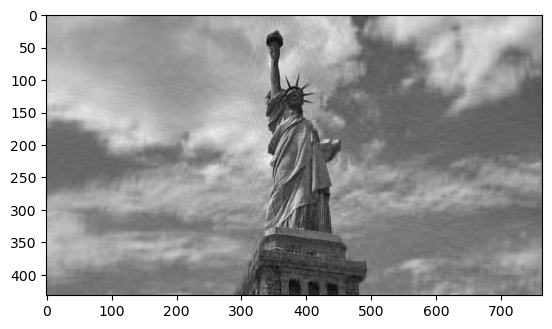

In [8]:
reconstimg = np.matrix(U[:, :50]) * np.diag(sigma[:50]) * np.matrix(VT[:50, :])
_ = plt.imshow(reconstimg, cmap='gray')

### Data compression by using subset of the singular values

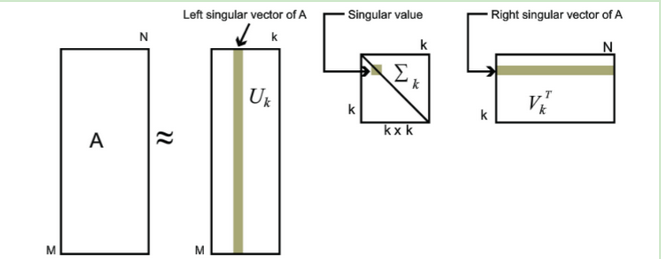

## Lab exercise of today

1. Find SVD decomposition of ```np.array([[-1, 2], [3, -2], [5, 7]])```. Confirm the three matrices can restore the original matrix.

2. Use Gram-Schmidt process to find QR decomposition of matrix ```np.array([[4, 2], [-5, -3]]) ```. Confirm the two matrices can restore the original matrix